# Parte 1: AED

## Carga de dataset.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv(r"C:\Users\luisP\Downloads\Hackaton-data\Online_Retail.csv", encoding='unicode_escape')

In [3]:
df.sample(10)

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
347891,567341,22697,GREEN REGENCY TEACUP AND SAUCER,12,19/09/2020 15:04,2.95,14961.0,United Kingdom
427278,573381,23282,FOLDING BUTTERFLY MIRROR IVORY,4,30/10/2020 14:05,0.83,17590.0,United Kingdom
500289,578757,22261,FELT EGG COSY WHITE RABBIT,1,25/11/2020 11:41,0.85,12748.0,United Kingdom
367676,568901,21707,FOLDING UMBRELLA BLACKBLUE POLKADOT,2,29/09/2020 13:22,4.95,15050.0,United Kingdom
345079,567141,22553,PLASTERS IN TIN SKULLS,12,16/09/2020 14:53,1.65,17370.0,United Kingdom
203874,554570,48188,DOORMAT WELCOME PUPPIES,2,25/05/2020 10:53,7.95,13728.0,United Kingdom
431174,573585,46776b,WOVEN BERRIES CUSHION COVER,1,31/10/2020 14:41,4.13,NaN,United Kingdom
440994,574559,23240,SET OF 4 KNICK KNACK TINS DOILY,1,04/11/2020 15:50,4.15,14056.0,United Kingdom
521051,580311,85049A,TRADITIONAL CHRISTMAS RIBBONS,12,02/12/2020 14:48,1.25,18245.0,United Kingdom
381844,569896,22553,PLASTERS IN TIN SKULLS,1,06/10/2020 15:58,1.65,NaN,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   INVOICE_NO    541909 non-null  object 
 1   STOCK_CODE    541909 non-null  object 
 2   DESCRIPTION   540455 non-null  object 
 3   QUANTITY      541909 non-null  int64  
 4   INVOICE_DATE  541909 non-null  object 
 5   UNIT_PRICE    541909 non-null  float64
 6   CUSTOMER_ID   406829 non-null  float64
 7   REGION        541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Transformacion de tipo de datos.

In [6]:
df['CUSTOMER_ID'] = df['CUSTOMER_ID'].astype(object)

In [7]:
df['INVOICE_DATE'] = pd.to_datetime(df['INVOICE_DATE'], format="%d/%m/%Y %H:%M")

In [8]:
df['INVOICE_DATE']

0        2019-12-01 08:26:00
1        2019-12-01 08:26:00
2        2019-12-01 08:26:00
3        2019-12-01 08:26:00
4        2019-12-01 08:26:00
                 ...        
541904   2020-12-09 12:50:00
541905   2020-12-09 12:50:00
541906   2020-12-09 12:50:00
541907   2020-12-09 12:50:00
541908   2020-12-09 12:50:00
Name: INVOICE_DATE, Length: 541909, dtype: datetime64[ns]

## Analisis estadistico. 

In [9]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
QUANTITY,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
INVOICE_DATE,541909,2020-07-04 08:55:02.927097344,2019-12-01 08:26:00,2020-03-28 11:34:00,2020-07-19 17:17:00,2020-10-19 11:27:00,2020-12-09 12:50:00,NaN
UNIT_PRICE,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853


In [10]:
df.select_dtypes('object').describe().T

,count,unique,top,freq
INVOICE_NO,541909,25900,573585,1114
STOCK_CODE,541909,4070,85123A,2313
DESCRIPTION,540455,4214,WHITE HANGING HEART T-LIGHT HOLDER,2369
CUSTOMER_ID,406829.0,4372.0,17841.0,7983.0
REGION,541909,38,United Kingdom,495478


<Axes: xlabel='QUANTITY'>

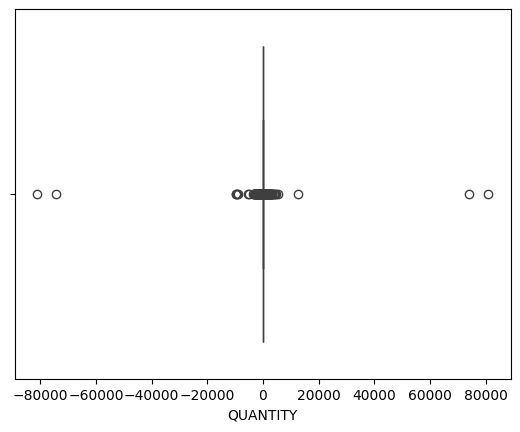

In [11]:
sns.boxplot(x=df['QUANTITY'])

<Axes: xlabel='UNIT_PRICE'>

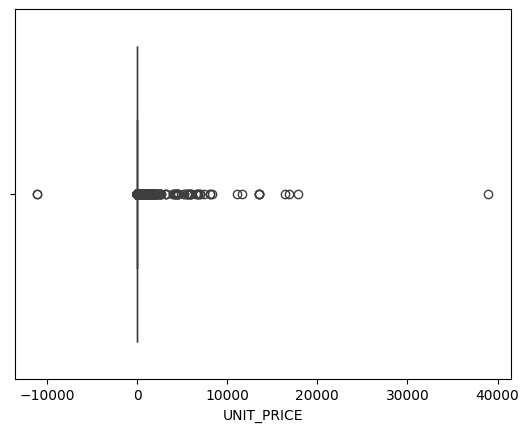

In [12]:
sns.boxplot(x=df['UNIT_PRICE'])

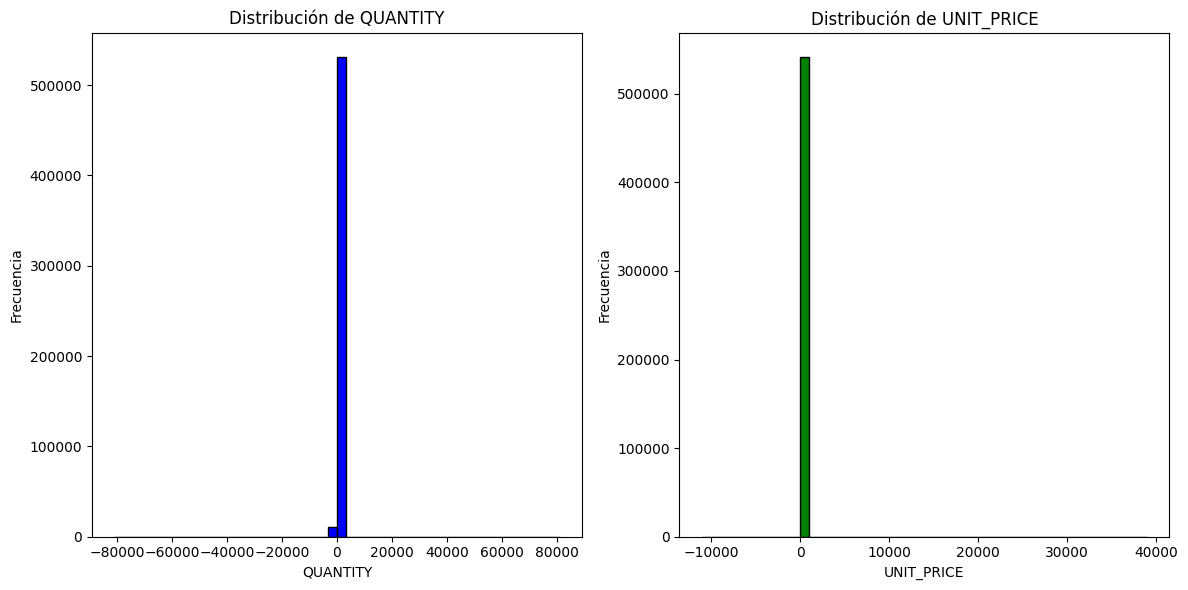

In [13]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['QUANTITY'], bins=50, color='blue', edgecolor='black')
plt.title('Distribución de QUANTITY')
plt.xlabel('QUANTITY')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(df['UNIT_PRICE'], bins=50, color='green', edgecolor='black')
plt.title('Distribución de UNIT_PRICE')
plt.xlabel('UNIT_PRICE')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

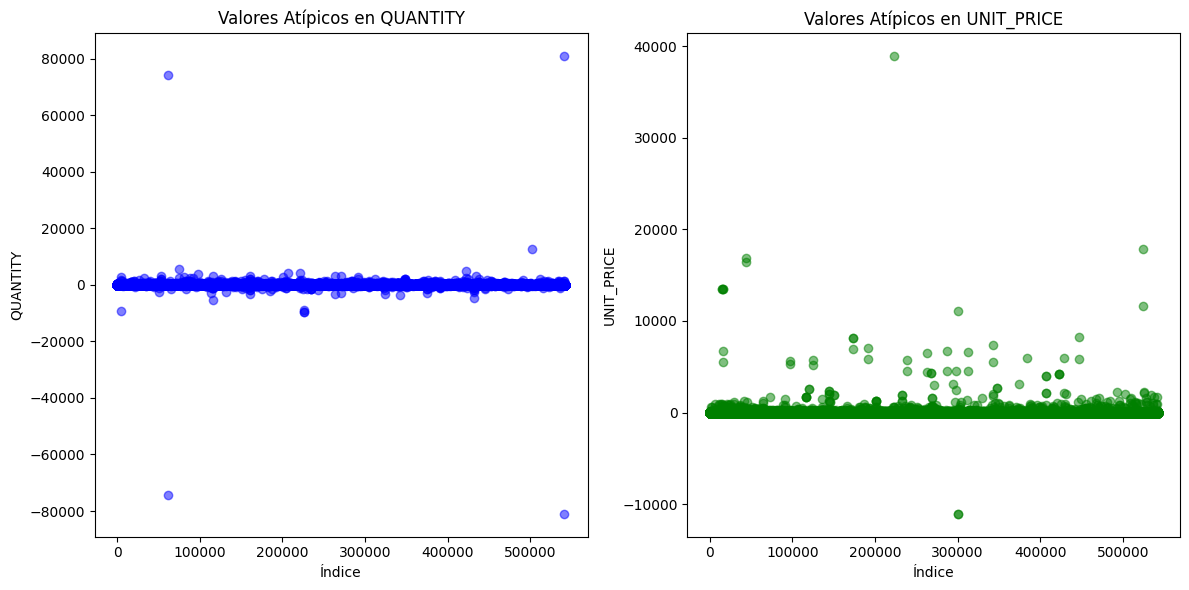

In [14]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(range(len(df)), df['QUANTITY'], alpha=0.5, color='blue')
plt.title('Valores Atípicos en QUANTITY')
plt.xlabel('Índice')
plt.ylabel('QUANTITY')

plt.subplot(1, 2, 2)
plt.scatter(range(len(df)), df['UNIT_PRICE'], alpha=0.5, color='green')
plt.title('Valores Atípicos en UNIT_PRICE')
plt.xlabel('Índice')
plt.ylabel('UNIT_PRICE')

plt.tight_layout()
plt.show()

## Tratamiendo de valores ausentes.

In [15]:
df['DESCRIPTION'] = df['DESCRIPTION'].replace('?', 'unknown')

In [16]:
df['DESCRIPTION'].fillna('unknown', inplace=True)

C:\Users\luisP\AppData\Local\Temp\ipykernel_22612\1782370504.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DESCRIPTION'].fillna('unknown', inplace=True)


In [17]:
df[df['DESCRIPTION']=='unknown']

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
622,536414,22139,unknown,56,2019-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,unknown,1,2019-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,unknown,1,2019-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,unknown,1,2019-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,unknown,1,2019-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,unknown,-2,2020-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,unknown,15,2020-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,unknown,6,2020-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,unknown,27,2020-12-08 10:33:00,0.0,NaN,United Kingdom


In [18]:
df[df['CUSTOMER_ID'].isna()]

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
622,536414,22139,unknown,56,2019-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2019-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2019-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2019-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2019-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2020-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2020-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2020-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2020-12-09 10:26:00,10.79,NaN,United Kingdom


In [19]:
df['CUSTOMER_ID'].fillna('unknown', inplace=True)

C:\Users\luisP\AppData\Local\Temp\ipykernel_22612\387019857.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CUSTOMER_ID'].fillna('unknown', inplace=True)


In [20]:
df.isna().sum()

INVOICE_NO      0
STOCK_CODE      0
DESCRIPTION     0
QUANTITY        0
INVOICE_DATE    0
UNIT_PRICE      0
CUSTOMER_ID     0
REGION          0
dtype: int64

## Tratamiento de duplicados.

In [36]:
df = df.drop_duplicates().reset_index(drop=True)

In [38]:
df.duplicated().sum()

0

## Seccion APARTE

In [39]:
df[df['QUANTITY'] < -2000]

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
4226,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2019-12-02 14:23:00,0.03,15838.0,United Kingdom
50310,540564,22617,mouldy thrown away.,-2600,2020-01-10 10:36:00,0.00,unknown,United Kingdom
61011,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2020-01-18 10:17:00,1.04,12346.0,United Kingdom
112554,545990,84598,check,-3000,2020-03-08 13:07:00,0.00,unknown,United Kingdom
114780,546152,72140F,throw away,-5368,2020-03-09 17:25:00,0.00,unknown,United Kingdom
130227,547560,72732,thrown away-can't sell,-2472,2020-03-23 17:28:00,0.00,unknown,United Kingdom
158702,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2020-04-18 13:08:00,2.10,15749.0,United Kingdom
183522,552733,23059,Thrown away-rusty,-2376,2020-05-11 10:48:00,0.00,unknown,United Kingdom
223651,556687,23003,Printing smudges/thrown away,-9058,2020-06-14 10:36:00,0.00,unknown,United Kingdom
223652,556690,23005,printing smudges/thrown away,-9600,2020-06-14 10:37:00,0.00,unknown,United Kingdom


In [40]:
df[df['QUANTITY'] > 3000]

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
52169,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2020-01-11 12:55:00,2.10,15749.0,United Kingdom
61006,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2020-01-18 10:01:00,1.04,12346.0,United Kingdom
73890,542504,37413,unknown,5568,2020-01-28 12:03:00,0.00,unknown,United Kingdom
96514,544612,22053,EMPIRE DESIGN ROSETTE,3906,2020-02-22 10:43:00,0.82,18087.0,United Kingdom
159101,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2020-04-18 13:20:00,2.10,15749.0,United Kingdom
204412,554868,22197,SMALL POPCORN HOLDER,4300,2020-05-27 10:52:00,0.72,13135.0,United Kingdom
218994,556231,85123A,unknown,4000,2020-06-09 15:04:00,0.00,unknown,United Kingdom
261753,560040,23343,came coded as 20713,3100,2020-07-14 14:28:00,0.00,unknown,United Kingdom
268703,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2020-07-19 17:04:00,0.06,14609.0,United Kingdom
418119,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2020-10-27 12:26:00,0.21,12901.0,United Kingdom


In [41]:
# VAMOS A BORRAR ESTOS DATOS

# df[(df['UNIT_PRICE'] == 0) & (df['DESCRIPTION'] == 'unknown') & (df['CUSTOMER_ID'] == 'unknown')].dropna(inplace=True).reset_index(drop=True)

## Segmentacion por clusteres.

In [42]:
data_positive_quantity = df.copy()

# Calcular el gasto total por cliente usando .loc para evitar SettingWithCopyWarning
data_positive_quantity.loc[:, 'TOTAL_SPENT'] = data_positive_quantity['QUANTITY'] * data_positive_quantity['UNIT_PRICE']

# Agrupar por 'CUSTOMER_ID' y calcular el gasto total y la cantidad total comprada
customer_data = data_positive_quantity.groupby('CUSTOMER_ID').agg(
    TOTAL_SPENT=pd.NamedAgg(column='TOTAL_SPENT', aggfunc='sum'),
    TOTAL_QUANTITY=pd.NamedAgg(column='QUANTITY', aggfunc='sum')
).reset_index()

# Mostrar los primeros registros del DataFrame para verificar
print(customer_data.head())

  CUSTOMER_ID  TOTAL_SPENT  TOTAL_QUANTITY
0     12346.0         0.00               0
1     12347.0      4310.00            2458
2     12348.0      1797.24            2341
3     12349.0      1757.55             631
4     12350.0       334.40             197


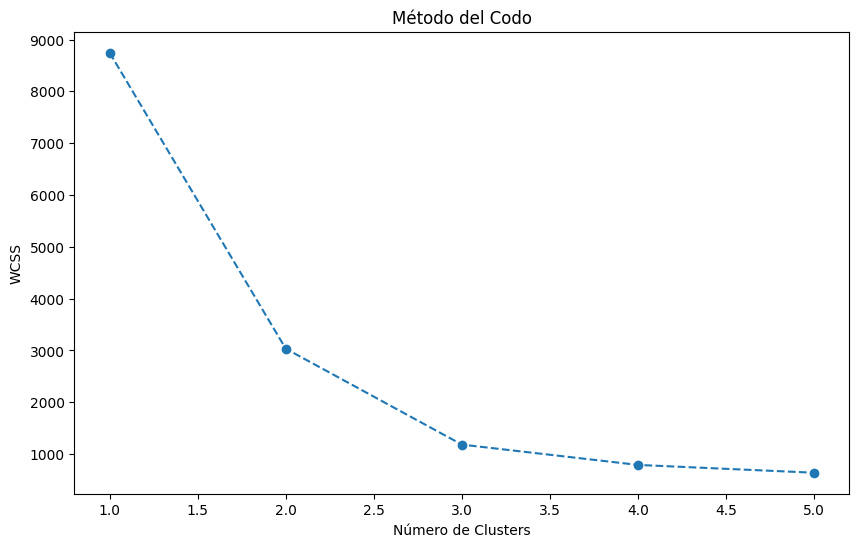

In [43]:

# Seleccionar las características para la segmentación
features = customer_data[['TOTAL_SPENT', 'TOTAL_QUANTITY']]

# Estandarizar los datos
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determinar el número óptimo de clusters utilizando el método del codo con un rango reducido
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo con el rango reducido
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

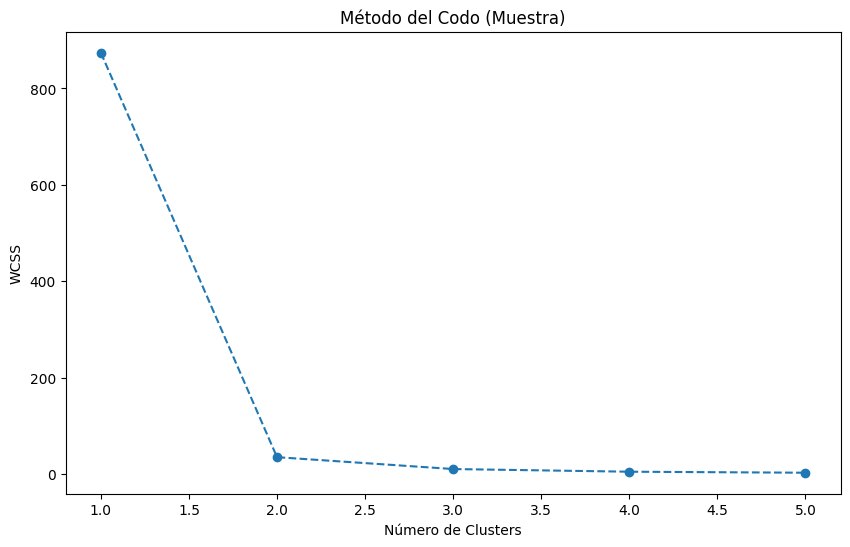

In [44]:
# Tomar una muestra del 10% del dataset de clientes para reducir la carga computacional
sampled_customer_data = customer_data.sample(frac=0.1, random_state=42)

# Seleccionar las características para la segmentación
features_sampled = sampled_customer_data[['TOTAL_SPENT', 'TOTAL_QUANTITY']]

# Estandarizar los datos
features_sampled_scaled = scaler.fit_transform(features_sampled)

# Determinar el número óptimo de clusters utilizando el método del codo con la muestra
wcss_sampled = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_sampled_scaled)
    wcss_sampled.append(kmeans.inertia_)

# Graficar el método del codo con el rango reducido y la muestra
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), wcss_sampled, marker='o', linestyle='--')
plt.title('Método del Codo (Muestra)')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

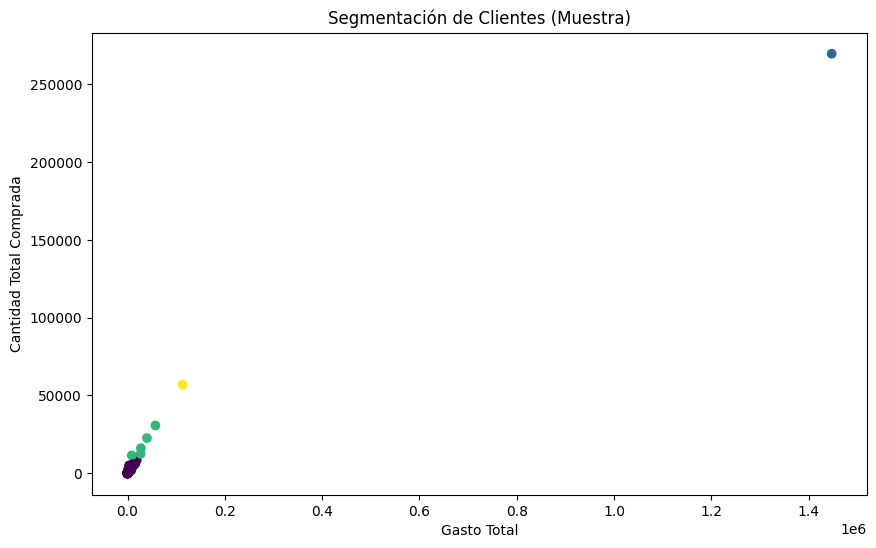

In [45]:
# Aplicar K-means con 3 clusters a la muestra de datos
kmeans = KMeans(n_clusters=4, random_state=42)
sampled_customer_data['CLUSTER'] = kmeans.fit_predict(features_sampled_scaled)

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(sampled_customer_data['TOTAL_SPENT'], sampled_customer_data['TOTAL_QUANTITY'], c=sampled_customer_data['CLUSTER'], cmap='viridis')
plt.title('Segmentación de Clientes (Muestra)')
plt.xlabel('Gasto Total')
plt.ylabel('Cantidad Total Comprada')
plt.show()

## Segmentacion por grupos.

In [62]:
df['TOTAL_REVENUE'] = df['QUANTITY'] * df['UNIT_PRICE']

df['MONTH'] = df['INVOICE_DATE'].dt.month
df['YEAR'] = df['INVOICE_DATE'].dt.year
df['DAY'] = df['INVOICE_DATE'].dt.day_of_week

df.sample(10)

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION,TOTAL_REVENUE,MONTH,YEAR,DAY
473613,577078,23165,LARGE CERAMIC TOP STORAGE JAR,2,2020-11-17 15:17:00,3.29,unknown,United Kingdom,6.58,11,2020,1
477142,577358,23100,SILVER BELLS TABLE DECORATION,3,2020-11-18 15:59:00,2.46,unknown,United Kingdom,7.38,11,2020,2
335276,566483,23439,HAND WARMER RED LOVE HEART,12,2020-09-13 09:47:00,2.10,13880.0,United Kingdom,25.20,9,2020,6
334918,566450,23309,SET OF 60 I LOVE LONDON CAKE CASES,24,2020-09-12 16:12:00,0.55,15673.0,United Kingdom,13.20,9,2020,5
290423,562560,37475,SET/4 COLOURFUL MIXING BOWLS,1,2020-08-05 17:12:00,9.95,14156.0,EIRE,9.95,8,2020,2
94526,544455,22996,TRAVEL CARD WALLET VINTAGE TICKET,24,2020-02-20 13:18:00,0.42,13097.0,United Kingdom,10.08,2,2020,3
211425,555524,23172,REGENCY TEA PLATE PINK,12,2020-06-05 11:37:00,1.65,16923.0,United Kingdom,19.80,6,2020,4
437417,574561,22630,DOLLY GIRL LUNCH BOX,2,2020-11-04 15:52:00,4.13,unknown,United Kingdom,8.26,11,2020,2
340559,566949,90018B,GOLD M.O.P ORBIT DROP EARRINGS,1,2020-09-15 16:32:00,4.15,unknown,United Kingdom,4.15,9,2020,1
374389,569545,22427,ENAMEL FLOWER JUG CREAM,3,2020-10-04 16:37:00,11.63,unknown,United Kingdom,34.89,10,2020,6


##  Frequency. 
---
Esta métrica se puede construir contando el número de compras que un cliente ha hecho, puede ser por compra, o por producto, depende del enfoque que uno le 
quiera dar

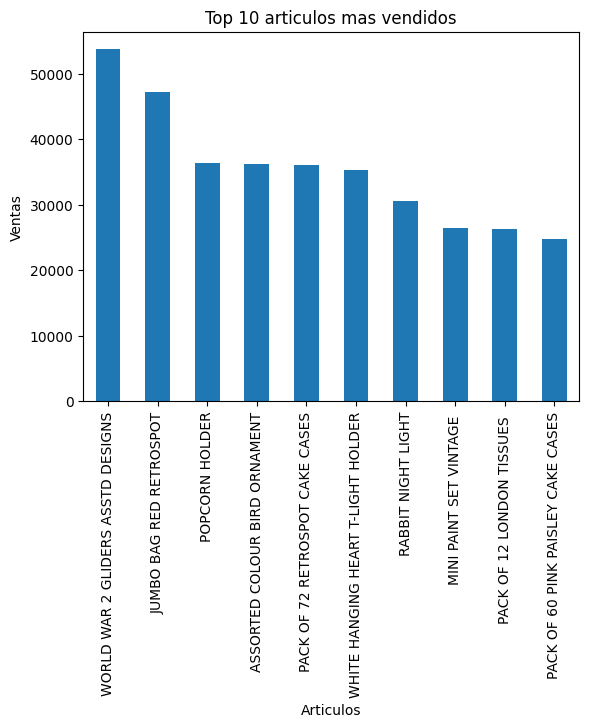

In [66]:
# ARTICULOS MAS VENDIDOS
top_10_products = df.groupby('DESCRIPTION')['QUANTITY'].sum().sort_values(ascending=False).head(10)

top_10_products.plot(kind="bar",x="DESCRIPTION",title="Top 10 articulos mas vendidos",ylabel="Ventas",xlabel="Articulos")
plt.show()

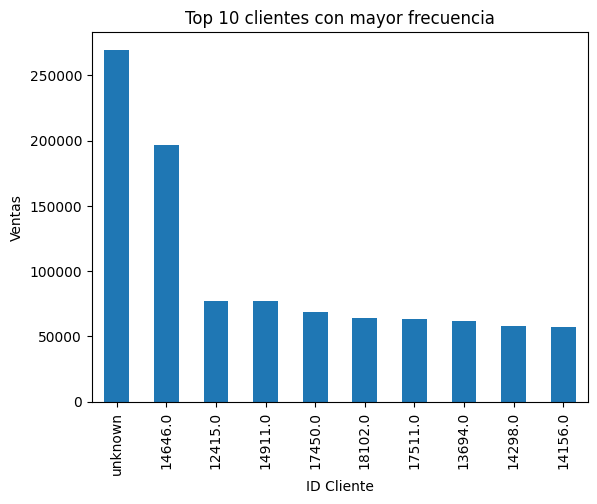

In [68]:
#CLIENTES CON MAS COMPRAS
top_10_products = df.groupby('CUSTOMER_ID')['QUANTITY'].sum().sort_values(ascending=False).head(10)

top_10_products.plot(kind="bar",x="CUSTOMER_ID",title="Top 10 clientes con mayor frecuencia",ylabel="Ventas",xlabel="ID Cliente")
plt.show()

##  Monetary. 
---
Esta métrica es la más sencilla, representa simplemente el monto en dinero invertido por el cliente comprando un producto.

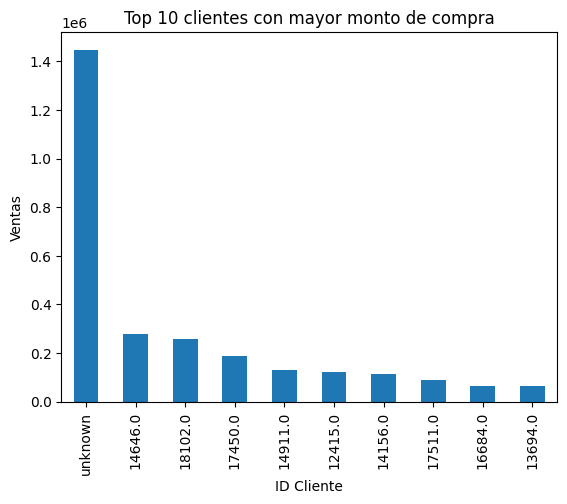

In [69]:
#CLIENTES QUE MAYOR GANANCIA DEJAN
top_10_products = df.groupby('CUSTOMER_ID')['TOTAL_REVENUE'].sum().sort_values(ascending=False).head(10)

top_10_products.plot(kind="bar",x="CUSTOMER_ID",title="Top 10 clientes con mayor monto de compra",ylabel="Ventas",xlabel="ID Cliente")
plt.show()

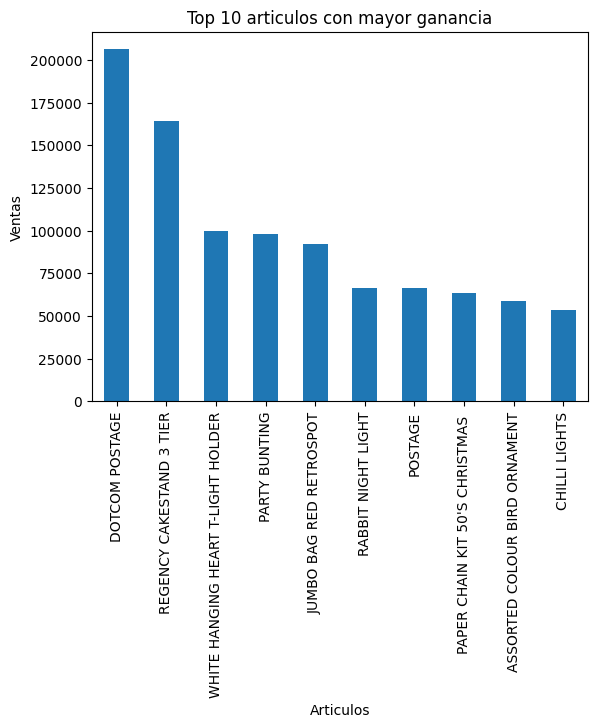

In [65]:
#ARTICULOS CON MAYOR GANANCIA
top_10_products = df.groupby('DESCRIPTION')['TOTAL_REVENUE'].sum().sort_values(ascending=False).head(10)

top_10_products.plot(kind="bar",x="DESCRIPTION",title="Top 10 articulos con mayor ganancia",ylabel="Ventas",xlabel="Articulos")
plt.show()

In [61]:
# df.groupby('INVOICE_DATE').agg({'CUSTOMER_ID':'sum'}).reset_index()

### Recency. 
---
Esta métrica se puede construir tomando como base el día actual y a este restar los días hasta la última fecha de compra del cliente, puede ser días, semanas, años, esto depende del tipo de industria y la frecuencia promedio de compra (las personas no compran un auto nuevo cada 2 semanas, o tal vez sí, pero no las conocemos). Así que puedes usar la última fecha de compra del conjunto de datos como parámetro para estimar la diferencia de días del resto de compras.


In [80]:
df_dates = df.sort_values('INVOICE_DATE')

df_dates.head()

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION,TOTAL_REVENUE,MONTH,YEAR,DAY
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2019-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2019,6
1,536365,71053,WHITE METAL LANTERN,6,2019-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2019,6
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2019-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2019,6
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2019-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2019,6
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2019-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2019,6


In [85]:
orders_per_month= df_dates.groupby('MONTH').agg({'CUSTOMER_ID':'nunique','TOTAL_REVENUE':'sum'})

orders_per_month['Orders_per_user'] = orders_per_month['TOTAL_REVENUE']/ orders_per_month['CUSTOMER_ID'] 
print(orders_per_month.head(12))
print()

mean_orders= orders_per_month['CUSTOMER_ID'].mean()
print('Promedio de compra por mes:',mean_orders)


       CUSTOMER_ID  TOTAL_REVENUE  Orders_per_user
MONTH                                             
1              784     558448.560       712.306837
2              799     497026.410       622.060588
3             1021     682013.980       667.986268
4              900     492367.841       547.075379
5             1080     722094.100       668.605648
6             1052     689977.230       655.871892
7              994     680156.991       684.262566
8              981     681386.460       694.583547
9             1303    1017596.682       780.964453
10            1426    1069368.230       749.907595
11            1712    1456145.800       850.552453
12            1375    1179424.670       857.763396

Promedio de compra por mes: 1118.9166666666667
